# Importing Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
print("Train Dataset Shape : {}".format(train.shape))
print("Test Dataset Shape : {}".format(test.shape))

Train Dataset Shape : (8693, 14)
Test Dataset Shape : (4277, 13)


# Data Visualization and Wrangling 

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Dropping Unrelate Features 

In [6]:
drop_list = ['PassengerId','Cabin','Name']
train_df = train.drop(drop_list, axis=1)
test_df = test.drop(drop_list, axis=1)
#train_df = train
#test_df = test

In [7]:
print("Train Dataset Shape : {}".format(train_df.shape))
print("Test Dataset Shape : {}".format(test_df.shape))

Train Dataset Shape : (8693, 11)
Test Dataset Shape : (4277, 10)


### NaN Value

In [8]:
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [9]:
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
ShoppingMall     98
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64

In [10]:
def nan_features(df):
    
    nullCheck_list=[]
    nullCheck = df.isnull().sum() / len(df) 

    # Checking any column with more then 50% Null Value
    cols = nullCheck[nullCheck > 0.5].index
    if len(cols) > 0:
        for col in cols:
            print("Features with More then 50% for NaN value : {}".format(col))
            df = df.drop(col, axis=1)
        
    else:
        print("\n No Features Exceeded Threshold")
    
    # Checking for any Null Value 
    F_fill = 'object'      
    M_fill = 'float64'
    cols = nullCheck[nullCheck > 0].index
    if len(cols) > 0:
        for col in cols:
            if df.dtypes[col] == F_fill:
                print("Features with NaN value with Object Datatype: {}".format(col))
                df[col] = df[col].fillna(method='ffill')
            else:
                print("Features with NaN value with Numerical Datatype : {}".format(col))
                df[col] = df[col].fillna(df[col].mean())
    
    return df

In [11]:
#  Filling all the Null value 
# "forward fill method" for all features with data type Object
# "Mean" for all the Numerical Features
train_df = nan_features(train_df)
test_df = nan_features(test_df)


 No Features Exceeded Threshold
Features with NaN value with Object Datatype: HomePlanet
Features with NaN value with Object Datatype: CryoSleep
Features with NaN value with Object Datatype: Destination
Features with NaN value with Numerical Datatype : Age
Features with NaN value with Object Datatype: VIP
Features with NaN value with Numerical Datatype : RoomService
Features with NaN value with Numerical Datatype : FoodCourt
Features with NaN value with Numerical Datatype : ShoppingMall
Features with NaN value with Numerical Datatype : Spa
Features with NaN value with Numerical Datatype : VRDeck

 No Features Exceeded Threshold
Features with NaN value with Object Datatype: HomePlanet
Features with NaN value with Object Datatype: CryoSleep
Features with NaN value with Object Datatype: Destination
Features with NaN value with Numerical Datatype : Age
Features with NaN value with Object Datatype: VIP
Features with NaN value with Numerical Datatype : RoomService
Features with NaN value wi

In [12]:
train_df.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [13]:
test_df.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

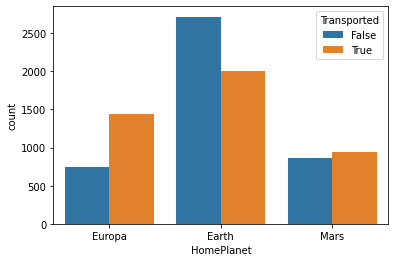

In [14]:
import seaborn as sns

sns.countplot(data = train_df, x = 'HomePlanet', hue='Transported')

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

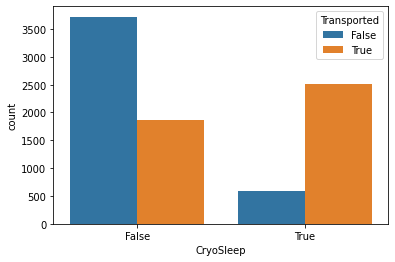

In [15]:
sns.countplot(data = train_df, x = 'CryoSleep', hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

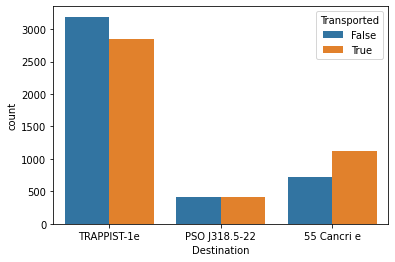

In [16]:
sns.countplot(data = train_df, x = 'Destination', hue='Transported')

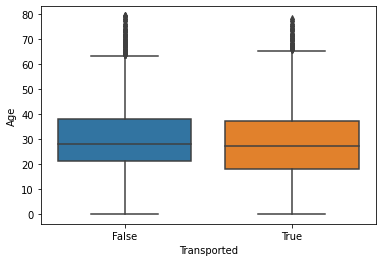

In [17]:
import matplotlib.pyplot as plt

sns.boxplot(data = train_df , y = 'Age', x = 'Transported');

<AxesSubplot:xlabel='VIP', ylabel='count'>

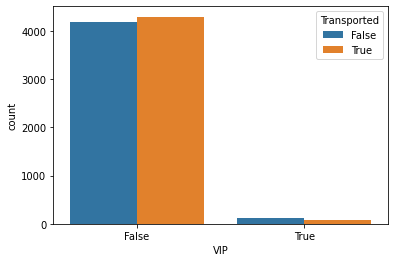

In [18]:
sns.countplot(data = train_df, x = 'VIP', hue='Transported')

In [19]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [20]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


### Data Normalization 

In [21]:
# Converting to boolen value
train_df['CryoSleep'] = train_df['CryoSleep'].apply(lambda x: 0 if x == False else 1)
train_df['Transported'] = train_df['Transported'].apply(lambda x: 0 if x == False else 1)
train_df['VIP'] = train_df['VIP'].apply(lambda x: 0 if x == False else 1)

test_df['CryoSleep'] = test_df['CryoSleep'].apply(lambda x: 0 if x == False else 1)
test_df['VIP'] = test_df['VIP'].apply(lambda x: 0 if x == False else 1)


In [22]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [23]:
train_df.dtypes

HomePlanet       object
CryoSleep         int64
Destination      object
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

In [24]:
from sklearn.compose import make_column_transformer
from sklearn import preprocessing

def normlized(df):
    
    dep_variable = 'Transported'
    dummy_dtype = 'object'
    zz_dtype = 'float64'
    
    features = df.columns
    dummy_feature_list=[]
    for feature in features:
        # Categorical Columns
        if df.dtypes[feature] == dummy_dtype:
            dummy_feature_list.append(feature)
            print("Dummy Varaibles : {} ".format(feature))

            dummy = pd.get_dummies(df[feature], drop_first=True)
            df = pd.concat([df, dummy], axis=1)
        elif df.dtypes[feature] == zz_dtype:
            print("ZZ varaibles for Scaling  : {} ".format(feature))
            df[feature] = preprocessing.scale(df[feature])

    #Dropping Dummy Varaibles
    df.drop(dummy_feature_list, axis=1, inplace=True)
    
    return df

In [25]:
train_nrm = normlized(train_df)

Dummy Varaibles : HomePlanet 
Dummy Varaibles : Destination 
ZZ varaibles for Scaling  : Age 
ZZ varaibles for Scaling  : RoomService 
ZZ varaibles for Scaling  : FoodCourt 
ZZ varaibles for Scaling  : ShoppingMall 
ZZ varaibles for Scaling  : Spa 
ZZ varaibles for Scaling  : VRDeck 


In [26]:
test_nrm = normlized(test_df)

Dummy Varaibles : HomePlanet 
Dummy Varaibles : Destination 
ZZ varaibles for Scaling  : Age 
ZZ varaibles for Scaling  : RoomService 
ZZ varaibles for Scaling  : FoodCourt 
ZZ varaibles for Scaling  : ShoppingMall 
ZZ varaibles for Scaling  : Spa 
ZZ varaibles for Scaling  : VRDeck 


In [27]:
train_nrm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,0,0.709437,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0,1,0,0,1
1,0,-0.336717,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,0,0,0,1
2,0,2.034566,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0,1,0,0,1
3,0,0.290975,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,0,1,0,0,1
4,0,-0.894666,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,0,0,0,1


In [28]:
test_nrm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,1,-0.118222,0,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,0,0,0,1
1,0,-0.688601,0,-0.364780,-0.285385,-0.319859,2.283008,-0.251561,0,0,0,1
2,1,0.166968,0,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,1,0,0,0
3,0,0.666051,0,-0.364780,4.118523,-0.319859,-0.110576,0.222074,1,0,0,1
4,0,-0.617304,0,-0.348143,-0.291352,0.825745,-0.274558,-0.251561,0,0,0,1


In [29]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0


# Building Model

In [30]:
from sklearn.model_selection import train_test_split
## Spliting the data
y = train_nrm['Transported']
X = train_nrm.drop('Transported', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 345)

In [31]:
print("X_train Dataset Shape : {}".format(X_train.shape))
print("y_train Dataset Shape : {}".format(y_train.shape))
print("X_test Dataset Shape : {}".format(X_test.shape))
print("y_test Dataset Shape : {}".format(y_test.shape))


X_train Dataset Shape : (6954, 12)
y_train Dataset Shape : (6954,)
X_test Dataset Shape : (1739, 12)
y_test Dataset Shape : (1739,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Accuracy : {}".format(accuracy_score(y_pred,y_test)))
print("Model F1 Accuracy : {}".format(f1_score(y_pred,y_test)))

Model Accuracy : 0.7947096032202415
Model F1 Accuracy : 0.8035222894881672


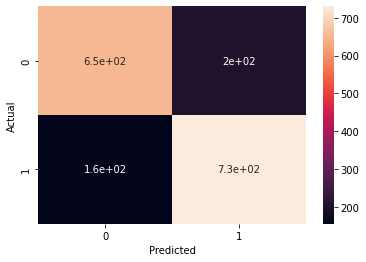

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       853
           1       0.78      0.82      0.80       886

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.80      0.79      0.79      1739



In [33]:
from sklearn.metrics import classification_report
import seaborn as sn

# Confusion Metrix
confusion_matrix = pd.crosstab(y_test, y_pred, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

stats = classification_report(y_test, y_pred)
print(stats)


## Prediction Using Test Data

In [34]:
y_pred = lr.predict(test_nrm)

In [35]:
dependent_var = pd.DataFrame(y_pred, columns =['Transported'])

In [36]:
transported = pd.concat([test,dependent_var],axis =1)

In [37]:
submission = transported.loc[:,['PassengerId','Transported']]

In [38]:
submission['Transported'] = submission['Transported'].apply(lambda x: 'False' if x == 0 else 'True')

In [39]:
submission.to_csv('submission.csv', index = False)

In [40]:
pd.read_csv('submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
